In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

In [2]:
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = np.concatenate([x, np.ones([n, 1])], axis=1)
y = (2*x[:, 0] - x[:, 1] + 0.5 + 0.5*np.random.randn(n)) > 0
y = 2*y - 1


# from sklearn.datasets import make_moons

# x, y = make_moons(n_samples = 200)
# x = moons.data
# y = moons.target
# y[y == 0] = -1

print("X shape: ", x.shape)
print("y shape: ", y.shape)

print("x sample:")
print(x[:5])
y = y.reshape(-1, 1)
print("y sample:")
print(y[:10])

X shape:  (200, 5)
y shape:  (200,)
x sample:
[[ 0.58940756 -0.641582   -0.81944564  0.15394431  1.        ]
 [ 0.65840691 -0.23068062  1.4422926   0.55448922  1.        ]
 [-0.0572043  -0.32364745 -0.47046595  0.68714912  1.        ]
 [-0.18428327 -1.32096631 -0.30586723  0.71398622  1.        ]
 [-0.95252481 -0.97364473  0.09465412  0.09548276  1.        ]]
y sample:
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]]


# Compute K

In [3]:
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = y[i]*y[j]*x[i].T.dot(x[j])
print(K.shape)

(200, 200)


# Loss Functions

In [4]:
def lagrange_dual(alpha, K, lamda):
    return alpha.T.dot(K).dot(alpha) / 4 / lamda - alpha

In [5]:
def compute_w_hat(x, y, alpha, lamda):
    return (alpha*y*x).sum(axis=0) / 2 / lamda

def hinge_loss(x, y, w, lamda):
    f = 1 - y*x.dot(w)
    mask = f > 0
    f *= mask
    return f.sum() + np.sum(w**2)

# Projection from 0 to 1

In [6]:

def projection(alpha):
    return (alpha - alpha.min()) / (alpha.max() - alpha.min())

# Train 

In [7]:
def compute_accuracy(x, y, w_hat):
    y_pred = (x.dot(w_hat) >= 0).astype(np.int)
    y_pred[y_pred == 0] = -1
    y_pred = y_pred.reshape(-1, 1)
    return (y == y_pred).mean()

alpha = np.random.randn(n, 1)

lr = 0.01
n_iter = 100
lamda = 6

lagrange_error = []
hinge_loss_hist = []
acc_hist = []

w_hat = compute_w_hat(x, y, alpha, lamda)

lagrange_error.append(lagrange_dual(alpha, K, lamda))
hinge_loss_hist.append(hinge_loss(x, y, w_hat, lamda))
acc = compute_accuracy(x, y, w_hat)
acc_hist.append(acc)

for i in range(n_iter):

    alpha = projection(alpha - lr * (K.dot(alpha)/2/lamda - 1))
    
    w_hat = compute_w_hat(x, y, alpha, lamda)
    
    
    
    lagrange_error.append(lagrange_dual(alpha, K, lamda))
    hinge_loss_hist.append(hinge_loss(x, y, w_hat, lamda))
    acc = compute_accuracy(x, y, w_hat)
    acc_hist.append(acc)
    
#     print("Iteration: {},     Acc: {}".format(i, acc))

In [8]:
lagrange_error = np.array(lagrange_error)
lagrange_error = lagrange_error.reshape(-1, n).sum(axis=1)
hinge_loss_hist = np.array(hinge_loss_hist)

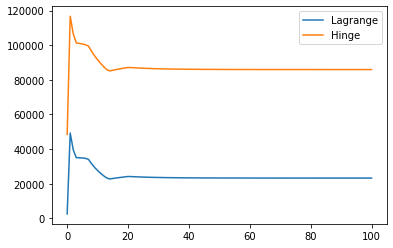

In [9]:
# lagrange_error -= (lagrange_error.min() - hinge_loss_hist.min())
plt.plot(range(n_iter+1), lagrange_error, label="Lagrange")
# plt.plot(range(n_iter), np.linalg.norm(lagrange_error.reshape(-1, n), axis=1))
# plt.plot(range(n_iter), lagrange_error.reshape(-1, n).sup(axis=1))
plt.plot(range(n_iter+1), hinge_loss_hist, label="Hinge")
plt.legend()
plt.show()

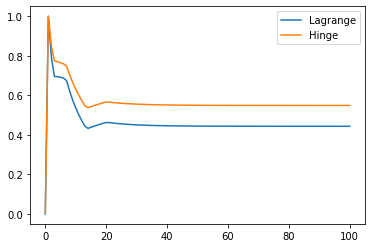

In [10]:
# lagrange_error -= (lagrange_error.min() - hinge_loss_hist.min())
plt.plot(range(n_iter+1), projection(lagrange_error), label="Lagrange")
# plt.plot(range(n_iter), np.linalg.norm(lagrange_error.reshape(-1, n), axis=1))
# plt.plot(range(n_iter), lagrange_error.reshape(-1, n).sup(axis=1))
plt.plot(range(n_iter+1), projection(hinge_loss_hist), label="Hinge")
plt.legend()
plt.show()

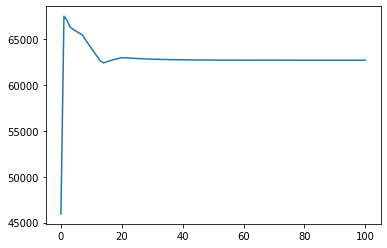

In [11]:
plt.plot(range(n_iter+1), hinge_loss_hist - lagrange_error)
plt.show()

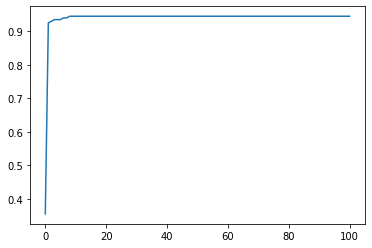

In [12]:
plt.plot(range(n_iter + 1), acc_hist)
plt.show()

(200, 2)


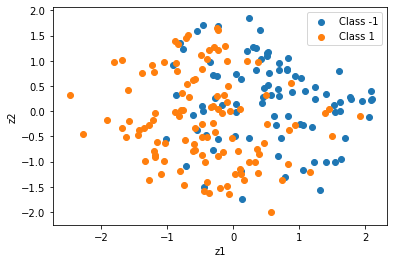

In [13]:
from sklearn.decomposition import IncrementalPCA
def pca(X):
    ipca = IncrementalPCA(n_components=2, batch_size=3)
    return ipca.fit_transform(X)

def pca_and_plot(x, y):
    classes = np.unique(y) 
    x_pca = pca(x)
    print(x_pca.shape)
    y_plot = y.ravel()
    
    for i in classes:
        plt.scatter(x_pca[y_plot == i, 0], x_pca[y_plot == i, 1], label="Class " + str(i))
    plt.xlabel("z1")
    plt.ylabel("z2")
    plt.legend()
    plt.show()
    
pca_and_plot(x, y)

(200, 2)


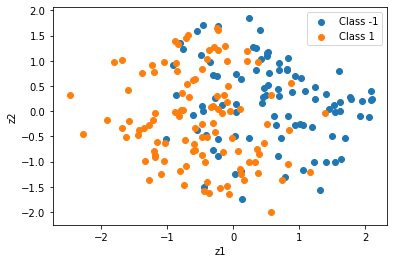

In [14]:
y_pred = (x.dot(w_hat) >= 0).astype(np.int)
y_pred[y_pred == 0] = -1
y_pred = y_pred.reshape(-1, 1)
pca_and_plot(x, y_pred)

# Dual coordinate descent

In [15]:
alpha = np.random.randn(n, 1)
# alpha = np.zeros((n, 1))
alpha_bar = np.zeros(alpha.shape)
# w = np.zeros(())
lr = 0.01
n_iter = 100
lamda = 2

lagrange_error = []
hinge_loss_hist = []
acc_hist = []

w_hat = compute_w_hat(x, y, alpha, lamda)

acc = compute_accuracy(x, y, w_hat)

acc_hist.append((y == y_pred).mean())
lagrange_error.append(lagrange_dual(alpha, K, lamda))
hinge_loss_hist.append(hinge_loss(x, y, w_hat, lamda))
def min_zero(value):
    if value > 0:
        return 0
    else:
        return value
    
def min_one(value):
    if value > 1:
        return 1
    else:
        return value

def max_zero(value):
    if value > 0:
        return value
    else:
        return 0
    
Q = x.dot(x.T)

for j in range(n_iter):
#     lagrange_error.append(lagrange_dual(alpha, K, lamda))
    alpha = projection(alpha - lr * (K.dot(alpha)/2/lamda - 1))
    for i in range(n):
        w_hat = compute_w_hat(x, y, alpha, lamda)

        G = y[i] * x[i].dot(w_hat) - 1
#         print(G.shape)
        if alpha[i] == 0:
            PG = min_zero(G)
        elif alpha[i] == 1:
            PG = max_zero(G)
        else:
            PG = G
        
        if np.abs(PG) != 0:
            alpha_bar[i] = alpha[i]
            alpha[i] = min_one(max_zero(alpha[i] - G / Q[i, i]))

            w_hat = w_hat + (alpha[i] - alpha_bar[i])*y[i]*x[i]
    lagrange_error.append(lagrange_dual(alpha, K, lamda))
    hinge_loss_hist.append(hinge_loss(x, y, w_hat, lamda))
    acc = compute_accuracy(x, y, w_hat)
    acc_hist.append(acc)
    
#     print("Iteration: {},     Acc: {}".format(i, acc))

In [16]:
lagrange_error = np.array(lagrange_error)
lagrange_error = lagrange_error.reshape(-1, n).sum(axis=1)
hinge_loss_hist = np.array(hinge_loss_hist)

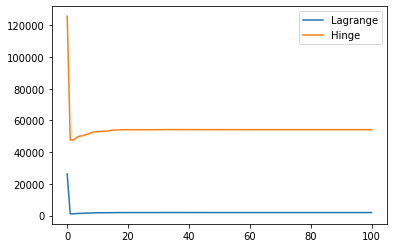

In [17]:
# lagrange_error -= (lagrange_error.min() - hinge_loss_hist.min())
plt.plot(range(n_iter+1), lagrange_error, label="Lagrange")
# plt.plot(range(n_iter), np.linalg.norm(lagrange_error.reshape(-1, n), axis=1))
# plt.plot(range(n_iter), lagrange_error.reshape(-1, n).sup(axis=1))
plt.plot(range(n_iter+1), hinge_loss_hist, label="Hinge")
plt.legend()
plt.show()

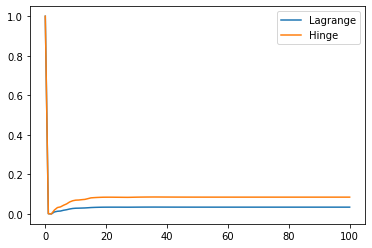

In [18]:
# lagrange_error -= (lagrange_error.min() - hinge_loss_hist.min())
plt.plot(range(n_iter+1), projection(lagrange_error), label="Lagrange")
# plt.plot(range(n_iter), np.linalg.norm(lagrange_error.reshape(-1, n), axis=1))
# plt.plot(range(n_iter), lagrange_error.reshape(-1, n).sup(axis=1))
plt.plot(range(n_iter+1), projection(hinge_loss_hist), label="Hinge")
plt.legend()
plt.show()

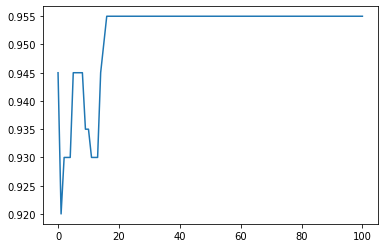

In [19]:
plt.plot(range(n_iter + 1), acc_hist)
plt.show()

(200, 2)


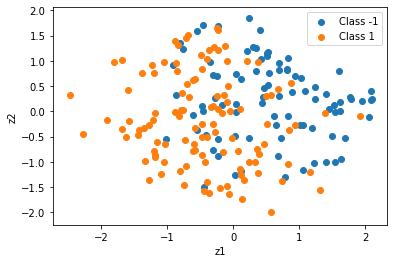

In [20]:
y_pred = (x.dot(w_hat) >= 0).astype(np.int)
y_pred[y_pred == 0] = -1
y_pred = y_pred.reshape(-1, 1)
pca_and_plot(x, y_pred)